# Kaggle Digit Recognizer Project

This is my first neural network project to recognize digits based off pixel MNIST data.

## 1) The Question
<b>This is taken directly from Kaggle.</b>
<br>
In this competition, your goal is to correctly identify digits from a dataset of tens of thousands of handwritten images. We’ve curated a set of tutorial-style kernels which cover everything from regression to neural networks. We encourage you to experiment with different algorithms to learn first-hand what works well and how techniques compare.

## 2) Train/Test data

I'm going to import some libraries and packages that I'll be using for this project. I'll import more libraries as I go on.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Let's read our training and test data.

In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [3]:
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We can see that both training and test set have upto 784 pixels. <br>
This is a 28 by 28 pixel image. <br>
The only difference is that train_df contains a label column that identifies which digit it is.

I want to check a few things about my pixel data.

In [5]:
train_df.isnull()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
41996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
41997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
41998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
train_df.isnull().values.any()

False

Here using values.any(), we can easily tell that we do not have any null values in our data set. <br>
Now that we know our data is clean, it's probably better for us to normalize our data.

In [10]:
Y_train = train_df["label"]
X_train = train_df.drop(["label"], axis = 1)
X_test = test_df

In [11]:
X_train = X_train / 255.0
X_test = X_test / 255.0

Let's try to visualize how our data looks like. <br>
Note that our data is MNIST. The data is already vectorized 784 times and each value corresponds to its grayscale value.

In [12]:
X_train.shape

(42000, 784)

In [13]:
Y_train.shape

(42000,)

Note that as of now, X_train and Y_train are dataframe with 42000 rows and 784 pixel columns.

In order to visualize our vectorized dataframe, we must convert/reshape it into 28x28 pixel matrix form. <br>
In addition, Python Keras requires data to be in 3 Dimensional matrix, so it makes sense to convert the data now.

In [14]:
X_train = X_train.to_numpy().reshape(-1, 28, 28, 1)

In [15]:
X_test = X_test.to_numpy().reshape(-1, 28, 28, 1)

We use 1 channel in here when we are reshaping our data because the images are in grayscale. No need to have it as 3 when it isn't in RGB channel.

In [40]:
print(X_train.shape)
print(X_test.shape)
print(type(X_train))

(42000, 28, 28, 1)
(28000, 28, 28, 1)
<class 'numpy.ndarray'>


We have successfully converted our data into 28x28x1 3 dimensional matrix arrays. 

In [17]:
plt.figure(figsize=(7,7))

def view_num(index):
    """Helper function to view image with index value of 'index'
    index: integer
    returns visualization of the number and its label.
    """
    image_index = X_train[index][:,:,0]
    #We don't need it to be 3 diemensional to visualize the image. Index slicing upto 784 pixels.
    plt.imshow(image_index, cmap='gray')
    plt.show
    print("The label associated with this image is: " + str(Y_train[index]))

<Figure size 504x504 with 0 Axes>

The label associated with this image is: 9


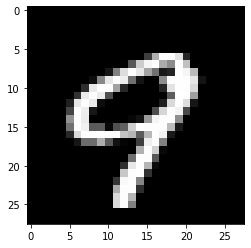

In [18]:
view_num(100)

The label associated with this image is: 0


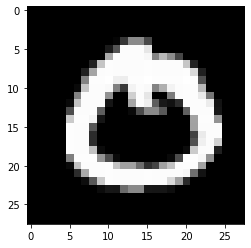

In [19]:
view_num(23)

Now I'll carry out one hot encoding on our Y_train series.

In [21]:
import tensorflow as tf

from keras.utils.np_utils import to_categorical

Y_train_encode = to_categorical(Y_train, num_classes=10)

In [22]:
Y_train_encode

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

## 3) Model Building

We have prepared our data for model building. <br>
Let's go ahead and split our training data into train and validation data. <br>
We will leave 10% of our training data as validation data.

In [23]:
from sklearn.model_selection import train_test_split
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

random_seed = 2

In [24]:
x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train_encode, test_size = 0.1, random_state = random_seed)

Let's go ahead and build our neural network model.

### Fully Connected Neural Network

In [25]:
model = keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(32, input_shape=(28, 28, 1), activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(10, activation='softmax')

])

model.compile(optimizer = 'adam', loss = "categorical_crossentropy" , metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5, batch_size = 32)

pred = model.predict(x_val)

Epoch 1/5
1182/1182 [==============================] - 1s 612us/step - loss: 0.4607 - accuracy: 0.8628
Epoch 2/5
1182/1182 [==============================] - 1s 611us/step - loss: 0.2071 - accuracy: 0.9395
Epoch 3/5
1182/1182 [==============================] - 1s 610us/step - loss: 0.1603 - accuracy: 0.9529
Epoch 4/5
1182/1182 [==============================] - 1s 619us/step - loss: 0.1347 - accuracy: 0.9596
Epoch 5/5
1182/1182 [==============================] - 1s 614us/step - loss: 0.1176 - accuracy: 0.9640


Here we built a fully connected neural network with 32 input neurons and a single hidden layer with 16 neurons. <br>
I've set epochs at 5 and batch_size at 32. For our validation data, we have an accuracy of 96%. These are pretty good numbers. <br>

We have to be wary of what optimizer we use for the CNN. I chose adam optimizer because of the following reasons.
* combines the best properties of the AdaGrad and RMSProp algorithms to provide an optimization algorithm.
* Relatively easy to configure and do well on most problems.

Loss function is used to quantify how well the model fit. It's the difference between observed and predicted.
We use categorical crossentropy as we have more than 2 classes. (10 in fact). <br>

Let's look at how the observed and predicted differ

In [33]:
# We are turning the predicted label values back into integers from hot encoded values.
Y_pred = np.argmax(pred,axis = 1)
Y_pred

array([6, 9, 5, ..., 2, 2, 0], dtype=int64)

In [28]:
Y_true = np.argmax(y_val, axis=1)
Y_true

array([6, 9, 5, ..., 2, 2, 6], dtype=int64)

In [49]:
error = []
for i in range(len(Y_true)):
    if Y_pred[i] != Y_true[i]:
        error = error + [i]
        

error_rate = len(error)/len(Y_true)
error_rate*100

4.809523809523809

Here we can see that our model predicted approximately 96% of the validation set correctly. <br>

'error' is now a list with indices of every wrong recognition from our validation set. <br>
Let's take a look at some of the wrong recognition. <br>

Here I want to quantify the worst errors. Meaning the prediction was further away from the true label.

In [82]:
plt.figure(figsize=(7,7))

def view_wrong_pred(index):
    """Helper function to view image with index value of 'index'
    index: integer
    returns visualization of the number and its label.
    """
    image_index = x_val[index][:,:,0]
    #We don't need it to be 3 diemensional to visualize the image. Index slicing upto 784 pixels.
    plt.imshow(image_index, cmap='gray')
    plt.show
    print("The predicted label is: " + str(Y_pred[index]))
    print("The true label is:" + str(Y_true[index]))

<Figure size 504x504 with 0 Axes>

In [61]:
#Quantifying the worst errors.
#Intensity of error measured by |Y_pred - Y_true| (How far the prediction is off)

error_intensity = [abs(a_i - b_i) for a_i, b_i in zip(Y_pred, Y_true)]
max(error_intensity)
#We see that the max intensity of error is 9, meaning our prediction was off by 9.
#Let's take a look at that example.

9

The predicted label is: 0
The true label is:9


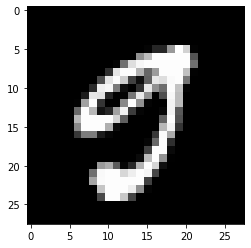

In [64]:
view_wrong_pred(error_intensity.index(9))

That looks like a pretty bad prediction. Let's take a look at error_intensity of 7.

The predicted label is: 8
The true label is:1


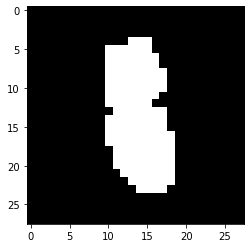

In [81]:
view_wrong_pred(error_intensity.index(7))

Let's see if convolutional neural network can perform a better.

### Convolutional Neural Network

My CNN architecture is going to be like this. <br>
Conv2D layer -> Max pooling -> Dropout -> Conv2D layer -> Average pooling -> Dropout -> Flatten -> output layer

In [100]:
model_CNN = keras.Sequential([
    keras.layers.Conv2D(32, 4, input_shape=(28, 28, 1), activation='relu'),
    keras.layers.Conv2D(32, 4, input_shape=(28, 28, 1), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(4,4), strides=(2,2)),
    
    keras.layers.Dropout(0.5),
    
    keras.layers.Conv2D(64, 3, activation='relu'),
    keras.layers.Conv2D(64, 3, activation='relu'),
    keras.layers.AveragePooling2D(pool_size=(4,4), strides=(2,2)),
    
    keras.layers.Dropout(0.5),
    
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation='softmax')
])

model_CNN.compile(optimizer='adam', loss="categorical_crossentropy", metrics=['accuracy'])

model_CNN.fit(x_train, y_train, epochs=5, batch_size = 32)

Epoch 1/5
1182/1182 [==============================] - 32s 27ms/step - loss: 0.3839 - accuracy: 0.8735
Epoch 2/5
1182/1182 [==============================] - 31s 26ms/step - loss: 0.1056 - accuracy: 0.9683
Epoch 3/5
1182/1182 [==============================] - 31s 26ms/step - loss: 0.0782 - accuracy: 0.9762
Epoch 4/5
1182/1182 [==============================] - 30s 26ms/step - loss: 0.0654 - accuracy: 0.9804
Epoch 5/5
1182/1182 [==============================] - 30s 25ms/step - loss: 0.0594 - accuracy: 0.9817


Now for the above neural network model there are 4 hidden layers.
I decided to add two convolutional layers of 32 filters and then additional two convolutional layers of 64 filters. <br>
This will allow my neural network to be more precise as it moves forward in the model. <br>
I've also created MaxPooling layer with (2,2) size and strides of (2,2) after convolutional layer of 32 filters. This was my way of trying to generalize features. <br>
My model fit with an accuracy of 98%. Let's see how we on the validation set.

In [89]:
CNN_pred = model_CNN.predict(x_val)

CNN_pred = np.argmax(CNN_pred,axis = 1)


error_CNN = []
for i in range(len(Y_true)):
    if CNN_pred[i] != Y_true[i]:
        error_CNN = error_CNN + [i]
        

error_rate_CNN = len(error_CNN)/len(Y_true)
error_rate_CNN*100

0.8809523809523809

Here we see our convolutional neural network model successfully predicted approximately 99.2% of validation set correctly. We managed to increase our accuracy by almost 3%.

Let's see if we have any common mistake from connected neural network and convolutional neural network.

In [108]:
#Intersection between error and error_CNN will give us common error from 2 models.
common_error = list(set(error) & set(error_CNN))

Here is the visualization of some of them.

The predicted label is: 1
The true label is:7


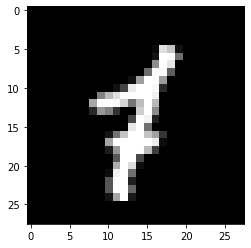

In [109]:
view_wrong_pred(common_error[0])

The predicted label is: 7
The true label is:9


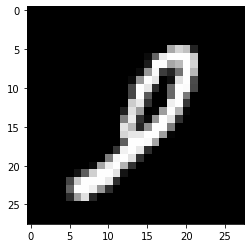

In [110]:
view_wrong_pred(common_error[5])

The predicted label is: 9
The true label is:2


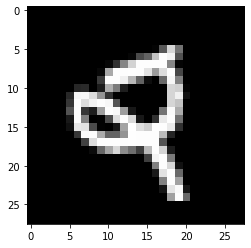

In [111]:
view_wrong_pred(common_error[-1])

It looks like common mistakes are due to weirdly shaped contours and just generally confusing drawings even from human eyes.

Let's go ahead and use our CNN model to predict on our test set.

In [121]:
#Results

prediction = model_CNN.predict(X_test)

#Reverse one hot encoding
prediction = np.argmax(prediction,axis = 1)

prediction = pd.Series(prediction,name="Label")

submit = pd.concat([pd.Series(range(1,28001),name = "ImageId"),prediction],axis = 1)

submit.to_csv("Prediction.csv",index=False)

I scored 798th on the leaderboard at the time of submission with accruacy of 99.014%

I hope you enjoyed my project on convolutional neural network MNIST character recognition. 

I had a lot of fun building this project.

Huge shoutout to Yassine Ghouzam for inspiration!

Project written by Harold Hyun Woo Lee

Thanks!